In [27]:
import numpy as np
import drawSvg as draw

import plaidml
import plaidml.exec
from plaidml.edsl import *


def edsl_program(X, Y):
    I, J, K = TensorDims(3)
    i, j, k = TensorIndexes(3)
    X.bind_dims(I, K)
    Y.bind_dims(K, J)
    R = TensorOutput(I, J)
    R[i, j] += X[i, k] * Y[k, j]
    return R

In [28]:
#  use placeholder, make them ints
A = Tensor(LogicalShape(plaidml.DType.FLOAT32, [3, 3]))
B = Tensor(LogicalShape(plaidml.DType.FLOAT32, [3, 3]))
O = edsl_program(A, B)

In [29]:
program = Program('edsl_program', [O])
#print(str(program))

In [30]:
output_dims = program.outputs[0].shape.int_dims
#print(output_dims)

In [38]:
binder = plaidml.exec.Binder(program)
executable = binder.compile()
binder.input(A).copy_from_ndarray(np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3))
binder.input(B).copy_from_ndarray(np.array([9,8,7,6,5,4,3,2,1]).reshape(3,3))
#view = binder.output(O)
#print(view.data())
executable.run()
# don't need astype
output_vals = binder.output(O).as_ndarray().astype(int)
#print(binder.output(O).as_ndarray())

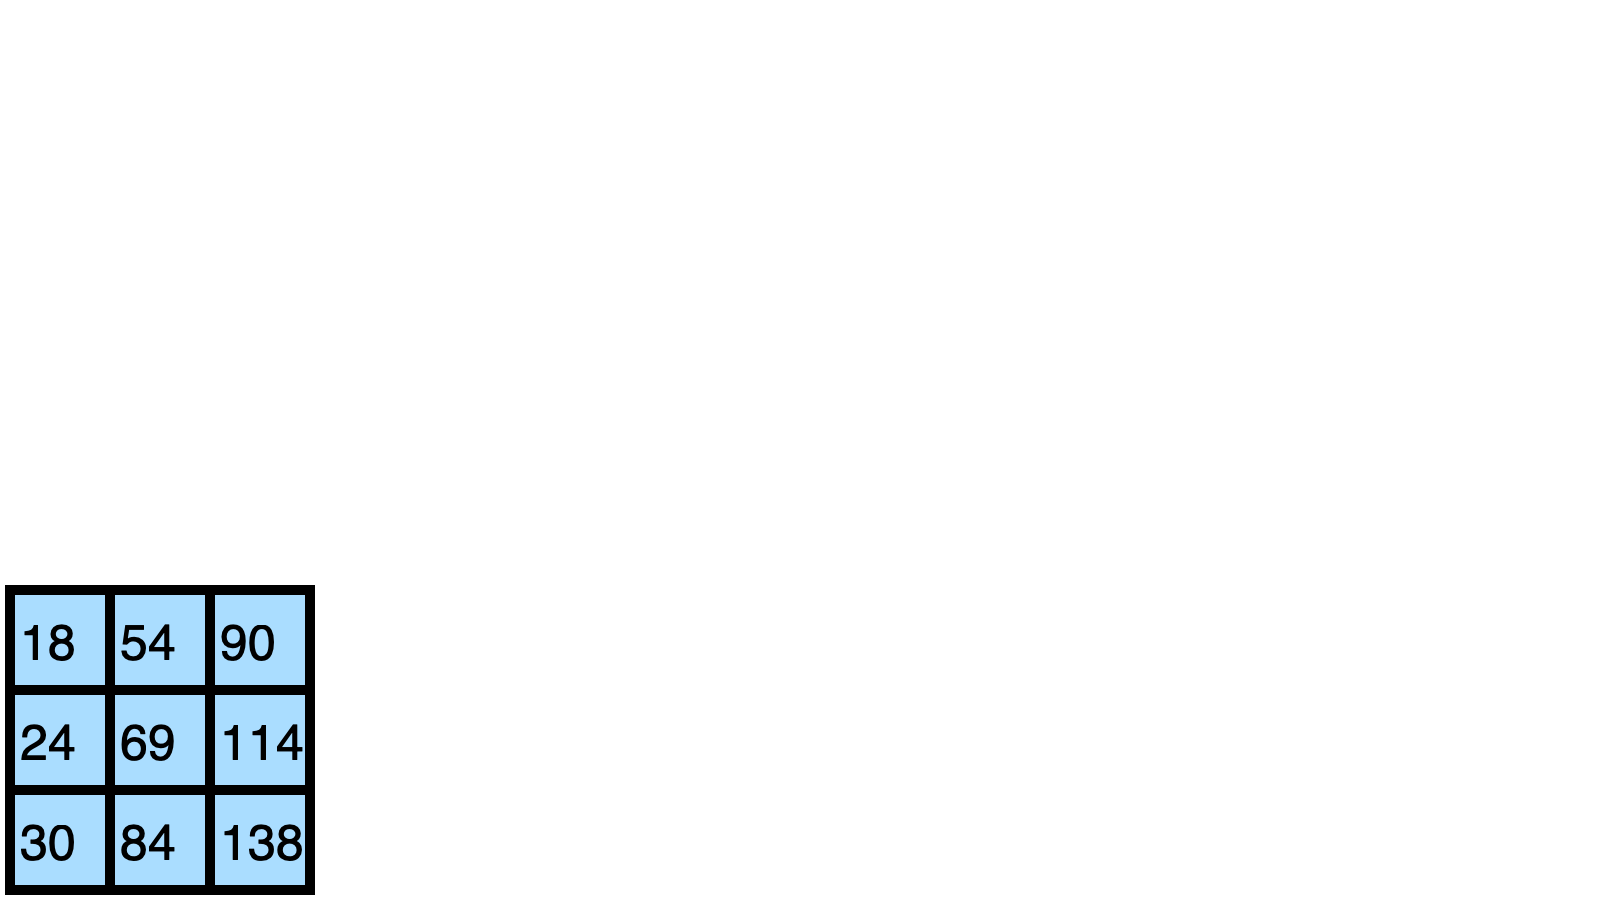

In [43]:
grid_width = 10
d = draw.Drawing(1600, 900, origin = (0, 0))
for x in range(output_dims[0]):
    for y in range(output_dims[1]):
        d.append(draw.Rectangle(100 * x + grid_width, 100 * y + grid_width, 
                                100, 100, 
                        stroke_width = grid_width, stroke = 'black',
                        fill = '#aaddff'))
        d.append(draw.Text(str(output_vals[x][y]), 50, 100 * x + 20, 100 * y + 40))
d.rasterize()